In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the NLTK library
import nltk

# Download the 'punkt' package for tokenization
nltk.download('punkt')

# Download the inaugural corpus
nltk.download('inaugural')

# Import the inaugural corpus from NLTK
from nltk.corpus import inaugural

# List the file identifiers (names) of all available inaugural addresses
inaugural.fileids()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [3]:
# Calculate the number of file identifiers
num_files=len(inaugural.fileids())
print('Number of inaugural addresses available:', num_files)

Number of inaugural addresses available: 59


In [4]:
# Retrieve the raw text of inaugural address of three US Prez
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

# **Number of characters, words and sentences in the three speeches we have downloaded**

In [5]:
print("ROOSEVELT'S 1941 SPEECH:")
print("No. of characters:", len(inaugural.raw('1941-Roosevelt.txt')))
print("No. of sentences:", len(inaugural.sents('1941-Roosevelt.txt')))
print("No. of words:", len(inaugural.words('1941-Roosevelt.txt')))

ROOSEVELT'S 1941 SPEECH:
No. of characters: 7571
No. of sentences: 68
No. of words: 1536


In [6]:
print("KENNEDY'S 1961 SPEECH:")
print("No. of characters:", len(inaugural.raw('1961-Kennedy.txt')))
print("No. of sentences:", len(inaugural.sents('1961-Kennedy.txt')))
print("No. of words:", len(inaugural.words('1961-Kennedy.txt')))

KENNEDY'S 1961 SPEECH:
No. of characters: 7618
No. of sentences: 52
No. of words: 1546


In [7]:
print("NIXON'S 1973 SPEECH:")
print("No. of characters:", len(inaugural.raw('1973-Nixon.txt')))
print("No. of sentences:", len(inaugural.sents('1973-Nixon.txt')))
print("No. of words:", len(inaugural.words('1973-Nixon.txt')))

NIXON'S 1973 SPEECH:
No. of characters: 9991
No. of sentences: 69
No. of words: 2028


In [8]:
# Define the index with labels for each speech
index=["Roosevelt's 1941 speech", "Kennedy's 1961 speech", "Nixon's 1973 speech"]

# Define the data as a dictionary
data={'No_of_characters':[7571, 7618, 9991],
      'No_of_sentences':[68, 52, 69],
      'No_of_words':[1536, 1546, 2028]}

# Create a DataFrame using the data dictionary and the defined index
df=pd.DataFrame(data,index)
df

,No_of_characters,No_of_sentences,No_of_words
Roosevelt's 1941 speech,7571,68,1536
Kennedy's 1961 speech,7618,52,1546
Nixon's 1973 speech,9991,69,2028


# **Remove all stopwords from the three speeches**

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
import string

# Get the list of English stopwords from NLTK and add additional punctuation and special characters
stopwords=nltk.corpus.stopwords.words('english')+list(string.punctuation)+['--','``',"''"]

In [11]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### **Roosevelt's speech**

In [12]:
# Create a list comprehension to filter out stopwords from the tokenized words
all_words_clean_1=[word for word in inaugural.words('1941-Roosevelt.txt') if word not in stopwords]

In [13]:
# Initialize an empty list to store the cleaned words
awc_1=[]

# Iterate over each word in the cleaned word list
for x in all_words_clean_1:

  # Check if the word is not a string representation of numbers from 0 to 9999
    if x not in str(list(range(0,9999))):

      # Convert the word to lowercase and append it to the cleaned words list
        awc_1.append(x.lower())

In [14]:
# Calculate the number of words tokenized from Roosevelt's 1941 inaugural address
num_words = len(inaugural.words('1941-Roosevelt.txt'))

# Calculate the length of the cleaned words list
num_cleaned_words = len(awc_1)

print("No. of words in the raw text of Roosevelt's 1941 inaugural address:", num_words)
print("No. of cleaned words from Roosevelt's 1941 inaugural address:", num_cleaned_words)

No. of words in the raw text of Roosevelt's 1941 inaugural address: 1536
No. of cleaned words from Roosevelt's 1941 inaugural address: 691


### **Kennedy's speech**

In [15]:
all_words_clean_2=[word for word in inaugural.words('1961-Kennedy.txt') if word not in stopwords]

In [16]:
awc_2=[]

for x in all_words_clean_2:
    if x not in str(list(range(0,9999))):
        awc_2.append(x.lower())

In [17]:
num_words = len(inaugural.words('1961-Kennedy.txt'))
num_cleaned_words = len(awc_2)

print("No. of words in the raw text of Kennedy's 1961 inaugural address:", num_words)
print("No. of cleaned words from Kennedy's 1961 inaugural address:", num_cleaned_words)

No. of words in the raw text of Kennedy's 1961 inaugural address: 1546
No. of cleaned words from Kennedy's 1961 inaugural address: 736


### **Nixon's speech**

In [18]:
all_words_clean_3=[word for word in inaugural.words('1973-Nixon.txt') if word not in stopwords]

In [19]:
awc_3=[]

for x in all_words_clean_3:
    if x not in str(list(range(0,9999))):
        awc_3.append(x.lower())

In [20]:
num_words = len(inaugural.words('1973-Nixon.txt'))
num_cleaned_words = len(awc_3)

print("No. of words in the raw text of Nixon's 1973 inaugural address:", num_words)
print("No. of cleaned words from Nixon's 1973 inaugural address:", num_cleaned_words)

No. of words in the raw text of Nixon's 1973 inaugural address: 2028
No. of cleaned words from Nixon's 1973 inaugural address: 894


In [21]:
data_1={'Count before stopwords removal':[1536, 1546, 2028],
        'Count after stopwords removal':[691, 736, 894]}

df_1=pd.DataFrame(data_1,index)
df_1

,Count before stopwords removal,Count after stopwords removal
Roosevelt's 1941 speech,1536,691
Kennedy's 1961 speech,1546,736
Nixon's 1973 speech,2028,894


In [24]:
# Join the cleaned words from Roosevelt's 1941 inaugural address into a single string
Roosevelt = ' '.join(awc_1)
Roosevelt

'on national day inauguration since people renewed sense dedication united states in washington day task people create weld together nation in lincoln day task people preserve nation disruption within in day task people save nation institutions disruption without to us come time midst swift happenings pause moment take stock recall place history rediscover may if risk real peril inaction lives nations determined count years lifetime human spirit the life man three score years ten little little less the life nation fullness measure live there men doubt there men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide but americans know true eight years ago life republic seemed frozen fatalistic terror proved true we midst shock acted we acted quickly boldly decisively these later years living years fruitful years people democracy for brought us greater security i hope be

In [25]:
# Join the cleaned words from Kennedy's 1961 inaugural address into a single string
Kennedy = ' '.join(awc_2)
Kennedy

'vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change for i sworn i almighty god solemn oath forebears l prescribed nearly century three quarters ago the world different for man holds mortal hands power abolish forms human poverty forms human life and yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state hand god we dare forget today heirs first revolution let word go forth time place friend foe alike torch passed new generation americans born century tempered war disciplined hard bitter peace proud ancient heritage unwilling witness permit slow undoing human rights nation always committed committed today home around world let every nation know whether wishes us well ill shall pay price bear burden meet hardship support friend oppose foe

In [26]:
# Join the cleaned words from Nixon's 1973 inaugural address into a single string
Nixon = ' '.join(awc_3)
Nixon

'mr vice president mr speaker mr chief justice senator cook mrs eisenhower fellow citizens great good country share together when met four years ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home as meet today stand threshold new era peace world the central question us how shall use peace let us resolve era enter postwar periods often time retreat isolation leads stagnation home invites new danger abroad let us resolve become time great responsibilities greatly borne renew spirit promise america enter third century nation this past year saw far reaching results new policies peace by continuing revitalize traditional friendships missions peking moscow able establish base new durable pattern relationships among nations world because america bold initiatives long remembered year greatest progress since end world war ii toward lasting peace world the peace seek world flimsy peace merely interlude wars peace endure generations come it importan

# **Find frequently occuring words in each of the three speeches**

### **Roosevelt's speech**

In [27]:
# Retrieving the top 5 most common words and their frequencies
nltk.FreqDist(awc_1).most_common(5)

[('it', 13), ('nation', 12), ('the', 10), ('know', 10), ('we', 10)]

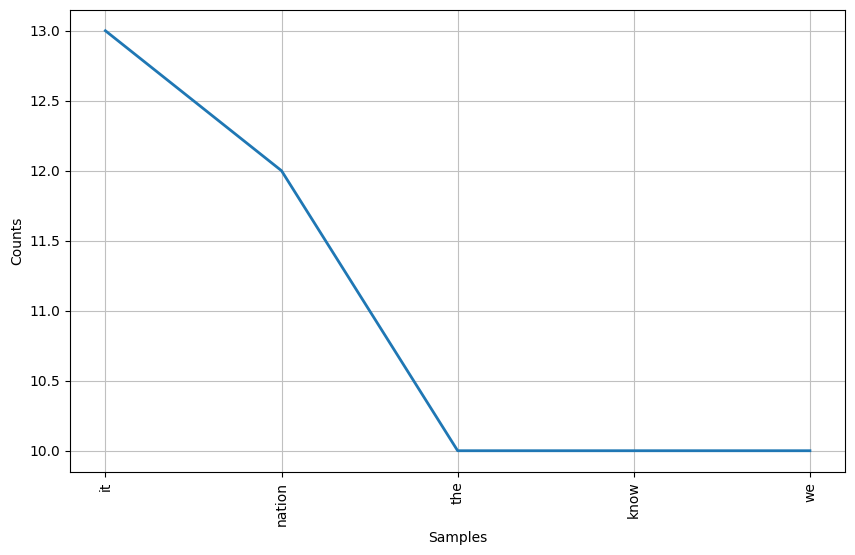

In [30]:
plt.figure(figsize=(10, 6))

# Calculating frequency distribution of all words
all_words_freq_1=nltk.FreqDist(awc_1)

# Plotting the top 5 most frequent words
all_words_freq_1.plot(5, cumulative=False)

plt.show();

### **Kennedy's speech**

In [ ]:
nltk.FreqDist(awc_2).most_common(5)

[('let', 16), ('us', 12), ('world', 8), ('sides', 8), ('new', 7)]

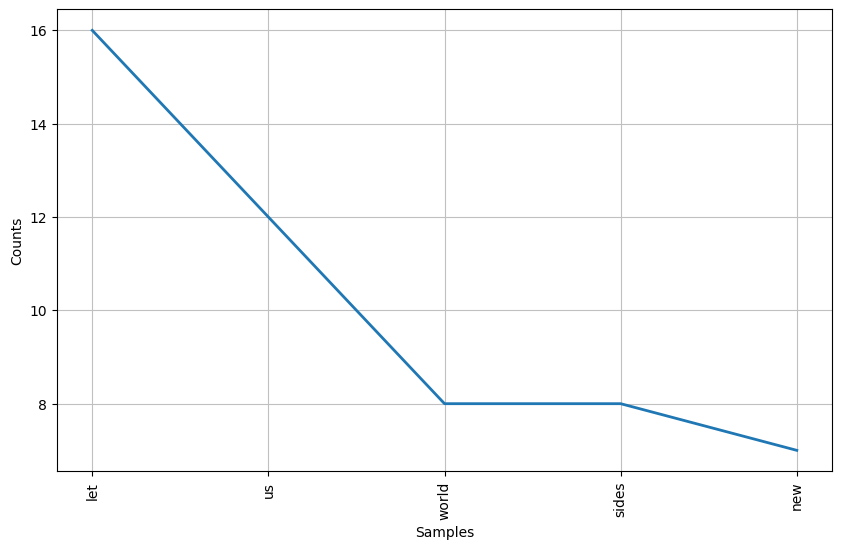

In [ ]:
plt.figure(figsize=(10, 6))

all_words_freq_2=nltk.FreqDist(awc_2)
all_words_freq_2.plot(5, cumulative=False)

plt.show();

### **Nixon's speech**

In [ ]:
nltk.FreqDist(awc_3).most_common(5)

[('us', 26), ('let', 22), ('america', 21), ('peace', 19), ('world', 18)]

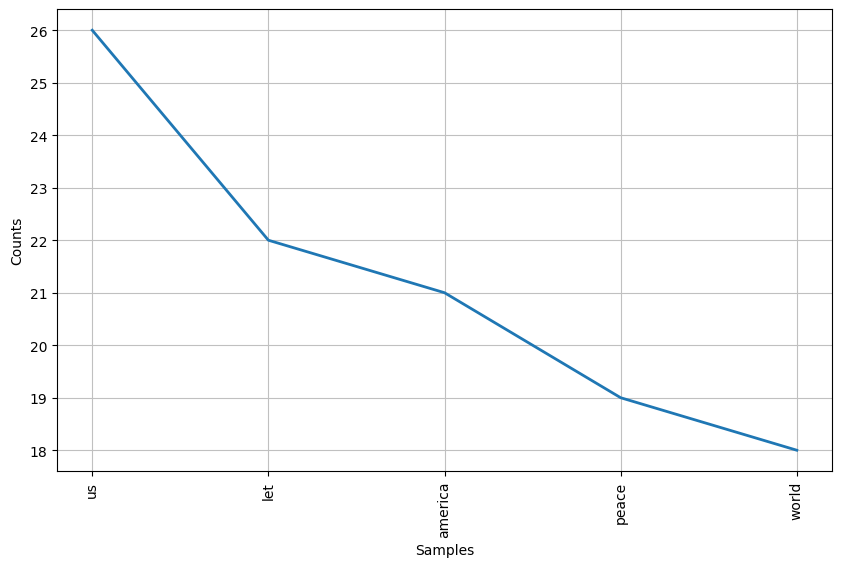

In [ ]:
plt.figure(figsize=(10, 6))

all_words_freq_3=nltk.FreqDist(awc_3)
all_words_freq_3.plot(5, cumulative=False)

plt.show();

 # **Word cloud of each of the three speeches (after removing the stopwords)**

In [ ]:
from wordcloud import WordCloud

### **Roosevelt's speech**


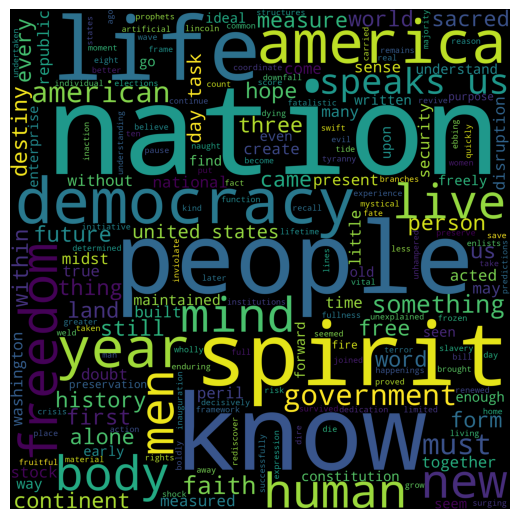

In [ ]:
wordcloud = WordCloud(width = 3000, height = 3000,
                background_color ='black',
                min_font_size = 10, random_state=100).generate(Roosevelt)

# Plot the WordCloud image
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0)

plt.show()

### **Kennedy's speech**

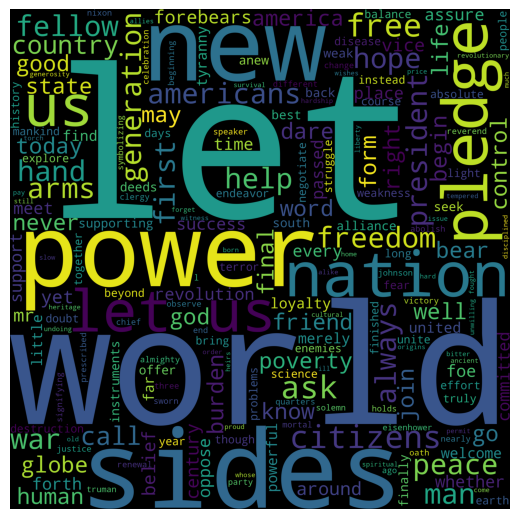

In [ ]:
wordcloud = WordCloud(width = 3000, height = 3000,
                background_color ='black',
                min_font_size = 10, random_state=100).generate(Kennedy)

# Plot the WordCloud image
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0)

plt.show()

### **Nixon's speech**

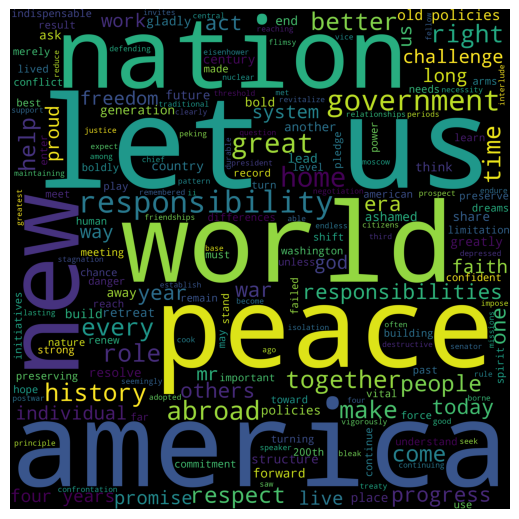

In [ ]:
wordcloud = WordCloud(width = 3000, height = 3000,
                background_color ='black',
                min_font_size = 10, random_state=100).generate(Nixon)

# Plot the WordCloud image
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0)

plt.show()